In [25]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score

In [26]:
data = pd.read_csv("./Dataset/real_estate_dataset.csv")
print(data)

      ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0      1   143.635030             1              3           3        1967   
1      2   287.678577             1              2           1        1949   
2      3   232.998485             1              3           2        1923   
3      4   199.664621             5              2           2        1918   
4      5    89.004660             4              3           3        1999   
..   ...          ...           ...            ...         ...         ...   
495  496   138.338057             2              2           2        1967   
496  497   195.914028             2              3           1        1977   
497  498    69.433659             1              1           2        2004   
498  499   293.598702             5              1           3        1940   
499  500   296.552686             4              3           1        1988   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distanc

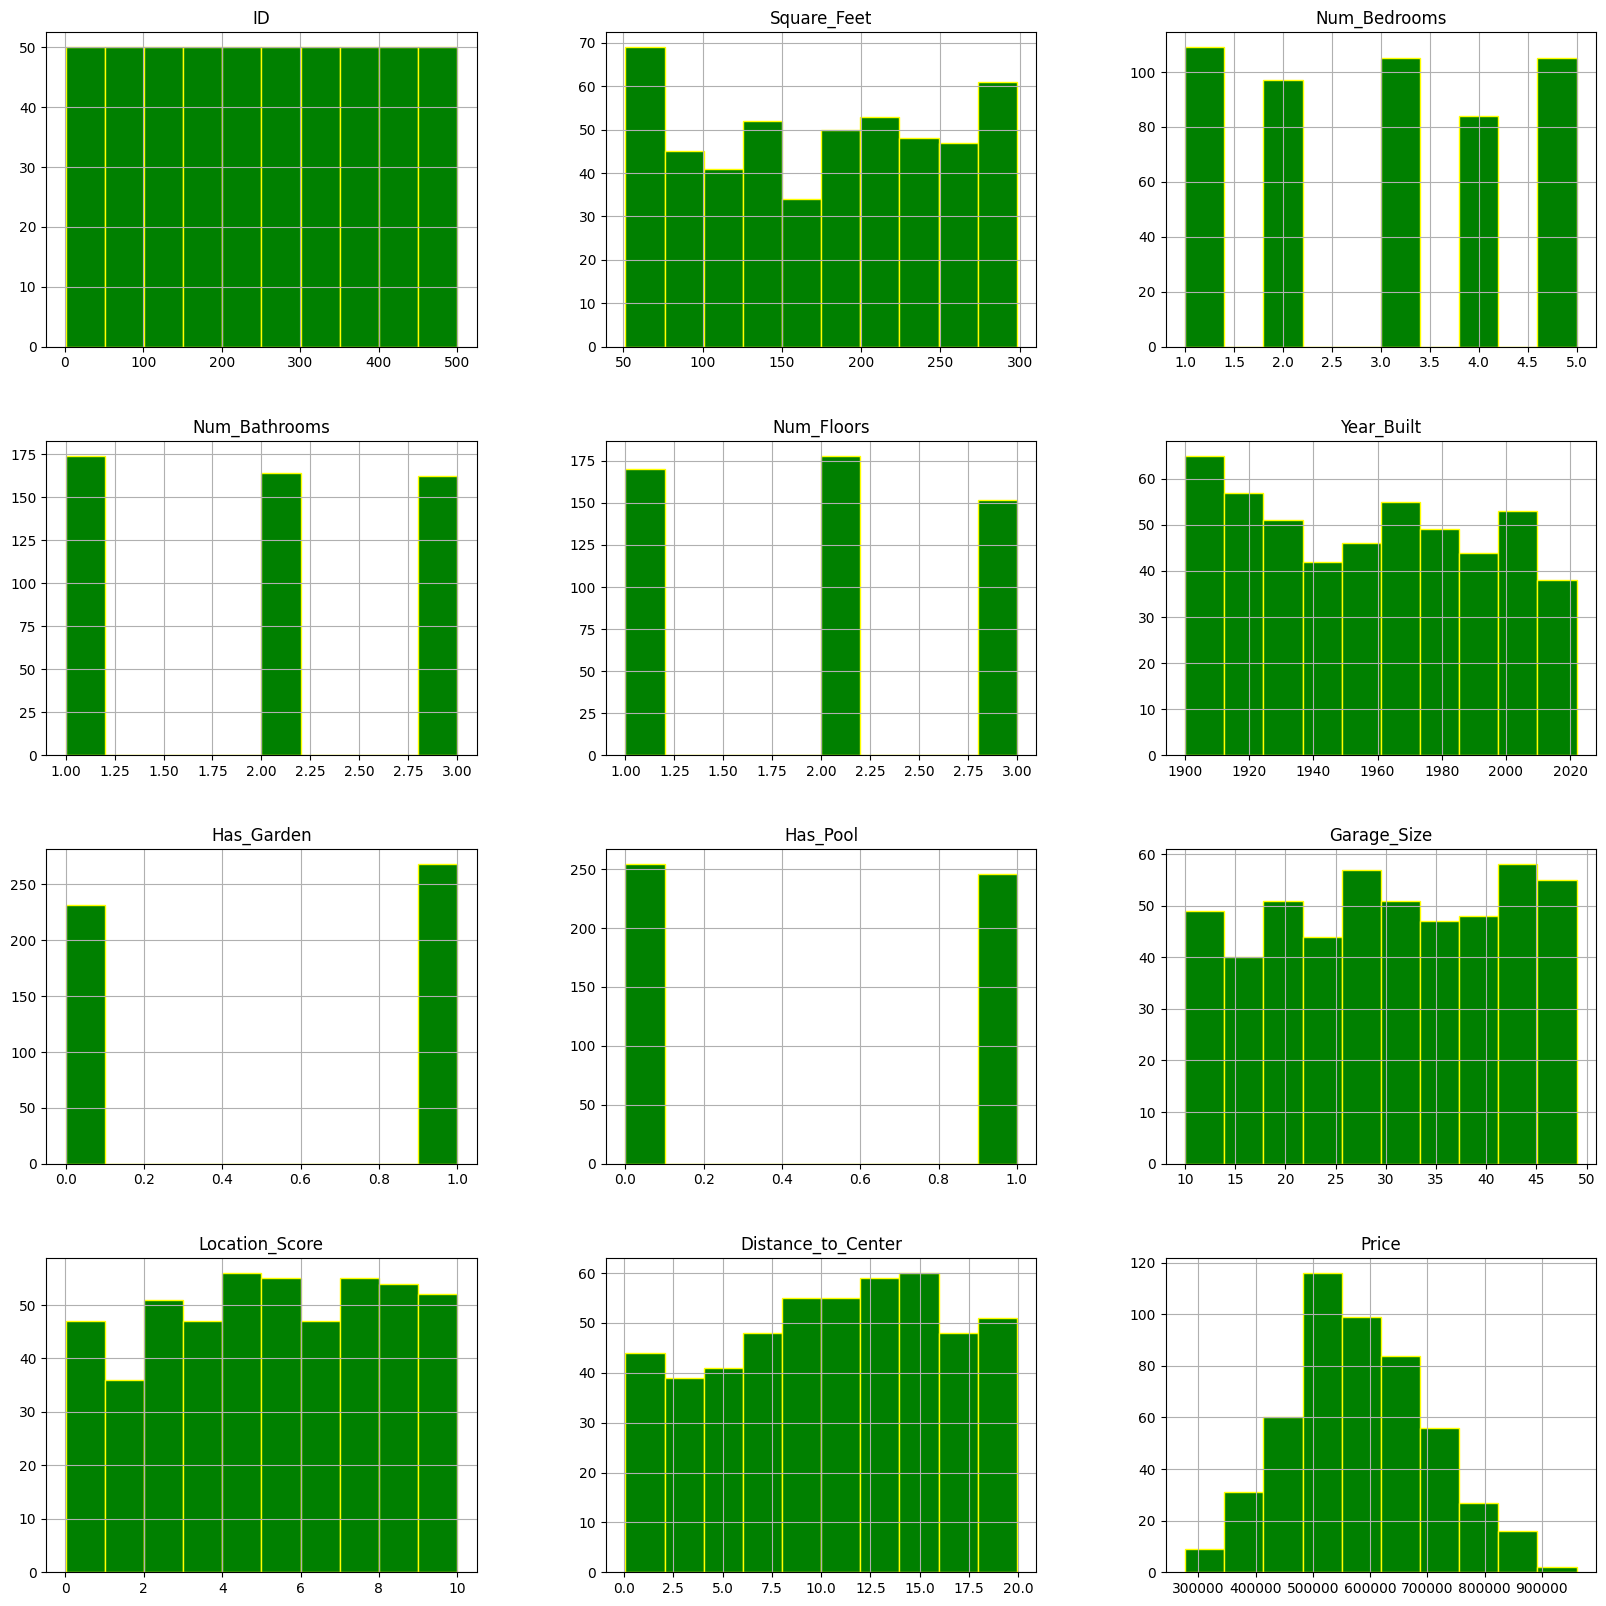

In [27]:
d = data.hist(figsize=(20,20), color='green', edgecolor='yellow')

In [28]:
x = data.iloc[:, 1:11]
y = data.iloc[:, 11]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
print("x_train: ", x_train)
print("x_test: ",x_test)
print("y_train: ",y_train)
print("y_test: ",y_test)
y

x_train:       Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
107   238.887785             5              3           3        1980   
336   263.865146             4              3           1        1991   
71     99.678920             4              1           2        1935   
474   181.925277             3              1           3        1995   
6      64.520903             4              3           1        1938   
..           ...           ...            ...         ...         ...   
323   119.983474             5              3           2        1951   
192   275.104514             2              3           3        1954   
117    96.642515             4              2           3        1935   
47    180.017005             5              2           1        1966   
172   178.023265             3              3           1        1996   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  
107           1         1           

0      602134.816747
1      591425.135386
2      464478.696880
3      583105.655996
4      619879.142523
           ...      
495    488496.350722
496    657736.921717
497    405324.950201
498    773035.968028
499    864299.500218
Name: Price, Length: 500, dtype: float64

In [29]:
x_standard = StandardScaler()
x_train = x_standard.fit_transform(x_train)
x_test = x_standard.fit_transform(x_test)

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)
print(model)

LinearRegression()


In [31]:
y_pred = model.predict(x_test)
print(y_pred)

[300390.95143928 398916.90597565 418542.33655001 529391.16844778
 607045.15137423 532079.93257822 761324.82932089 692221.35735485
 566522.4099052  691346.19761173 766677.71323678 455908.69356795
 747202.19803897 795275.26415683 345640.24536268 668646.29395423
 547731.16547912 645407.68072906 534584.99841338 472069.75792325
 468362.66289547 833801.13495107 602210.70218119 442529.94642246
 822685.79575938 665023.42164828 464515.09373334 847962.39229507
 816363.70841509 823163.52021648 632956.73760118 571108.32480023
 556491.96015914 775085.01689981 488995.73993914 621420.15560568
 465301.60168968 447142.28607887 552343.85025538 431254.92677771
 720071.5661253  536790.52035936 569591.07863434 604725.18259488
 810492.82127637 593214.68295066 596874.69649194 494538.06634424
 586866.54309616 327207.75521723 506889.73582725 543165.8165984
 503539.02288233 514360.64435205 435705.43137741 703880.54770638
 541567.72911465 482157.05609189 329496.82415109 489835.68809322
 439900.70104876 677948.83

In [32]:
print("He so hoi quy: ",model.coef_)
print("Intercept: ",model.intercept_)

He so hoi quy:  [ 76425.70232316  71876.26094038  24337.24406065  16710.16031189
  53071.242946    15959.24533096  23889.96635673  13386.29784779
  13478.80942465 -11282.04325165]
Intercept:  581763.2729903669


In [33]:
with open("Best_Model.pkl","wb") as file:
    pickle.dump(model, file)